<a href="https://colab.research.google.com/github/annapinyaeva/SPPR/blob/main/%D0%9B%D0%B0%D0%B12/SPPR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

ratings_df = pd.read_csv("/rating.csv")
print('Unique users count: {}'.format(len(ratings_df['user_id'].unique())))
print('Unique movies count: {}'.format(len(ratings_df['anime_id'].unique())))
print('DataFrame shape: {}'.format(ratings_df.shape))

ratings_df.head()

Unique users count: 41796
Unique movies count: 9822
DataFrame shape: (4429526, 3)


,user_id,anime_id,rating
0,1,20,-1.0
1,1,24,-1.0
2,1,79,-1.0
3,1,226,-1.0
4,1,241,-1.0


In [6]:
#берем первые 100000 строк базы
n = 100000
ratings_df_sample = ratings_df[:n]
n_users = len(ratings_df_sample['user_id'].unique())
n_anime = len(ratings_df_sample['anime_id'].unique())

(n_users, n_anime)

(1028, 5154)

In [7]:
#отмасштабируем идентификаторы фильмов таким образом, чтобы они начинались с 1 и заканчивались на n_movies
anime = ratings_df_sample['anime_id'].unique()

def scale_anime_id(animeID):
  scaled = np.where(animeID == animeID)[0][0] + 1
  return scaled
ratings_df['anime_id']=ratings_df['anime_id'].apply(scale_anime_id)
ratings_df_sample.head()

,user_id,anime_id,rating
0,1,1,-1.0
1,1,1,-1.0
2,1,1,-1.0
3,1,1,-1.0
4,1,1,-1.0


In [9]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6396683342a671b116748995df3e76e184d598d381d69a09fbe50a12e5a79f8d
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [11]:
#Делим набор данных на обучающий и тестовый
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(ratings_df, test_size = 0.25)

print('Train shape: {}'.format(train_dataset.shape))
print('Test shape: {}'.format(test_dataset.shape))

Train shape: (3322144, 3)
Test shape: (1107382, 3)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Считаем среднеквадратичную ошибку
def rmse(prediction, ground_truth):
     # Оставим оценки, предсказанные алгоритмом, только для соотвествующего набора данных
    prediction = np.nan_to_num(prediction)[ground_truth.nonzero()].flatten()
        # Оставим оценки, которые реально поставил пользователь, только для соотвествующего набора данных
    ground_truth = np.nan_to_num(ground_truth)[ground_truth.nonzero()].flatten()

    mse = mean_squared_error(prediction, ground_truth)
    return sqrt(mse)
    
#Сформируем матрицы размера (n_users, n_movies) для обучающего и тестового наборов таким образом, 
#чтобы элемент в ячейке [i, j] отражал оценку i-го пользователя j-му фильму
train_data_matrix = np.zeros((n_users, n_anime))
for line in train_dataset.itertuples():
    train_data_matrix[line[1]-1, line[2]-1]=line[3]

test_data_matrix = np.zeros((n_users, n_anime))
for line in test_dataset.itertuples():
    test_data_matrix[line[1] - 1, line[2] - 1] = line[3]


In [13]:
#Смотрим файл
anime_df = pd.read_csv("/anime.csv")
data_df = pd.merge(ratings_df, anime_df, on = 'anime_id')
data_df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,1,-1.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1,1,1,-1.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
2,1,1,-1.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
3,1,1,-1.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
4,1,1,-1.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824


In [16]:
#Рейтинг мультика
data_df.groupby("name")["rating_y"].mean().sort_values(ascending=False)

name
Cowboy Bebop    8.82
Name: rating_y, dtype: float64

In [17]:
#Количество оценок к мультику
data_df.groupby("name")["rating_y"].count().sort_values(ascending=False).head()

name
Cowboy Bebop    4429526
Name: rating_y, dtype: int64

In [18]:
ratings = pd.DataFrame(data_df.groupby("name")["rating_y"].mean())

ratings['Num of ratings'] = pd.DataFrame(data_df.groupby("name")["rating_y"].count())

ratings.head()

,rating_y,Num of ratings
name,,
Cowboy Bebop,8.82,4429526


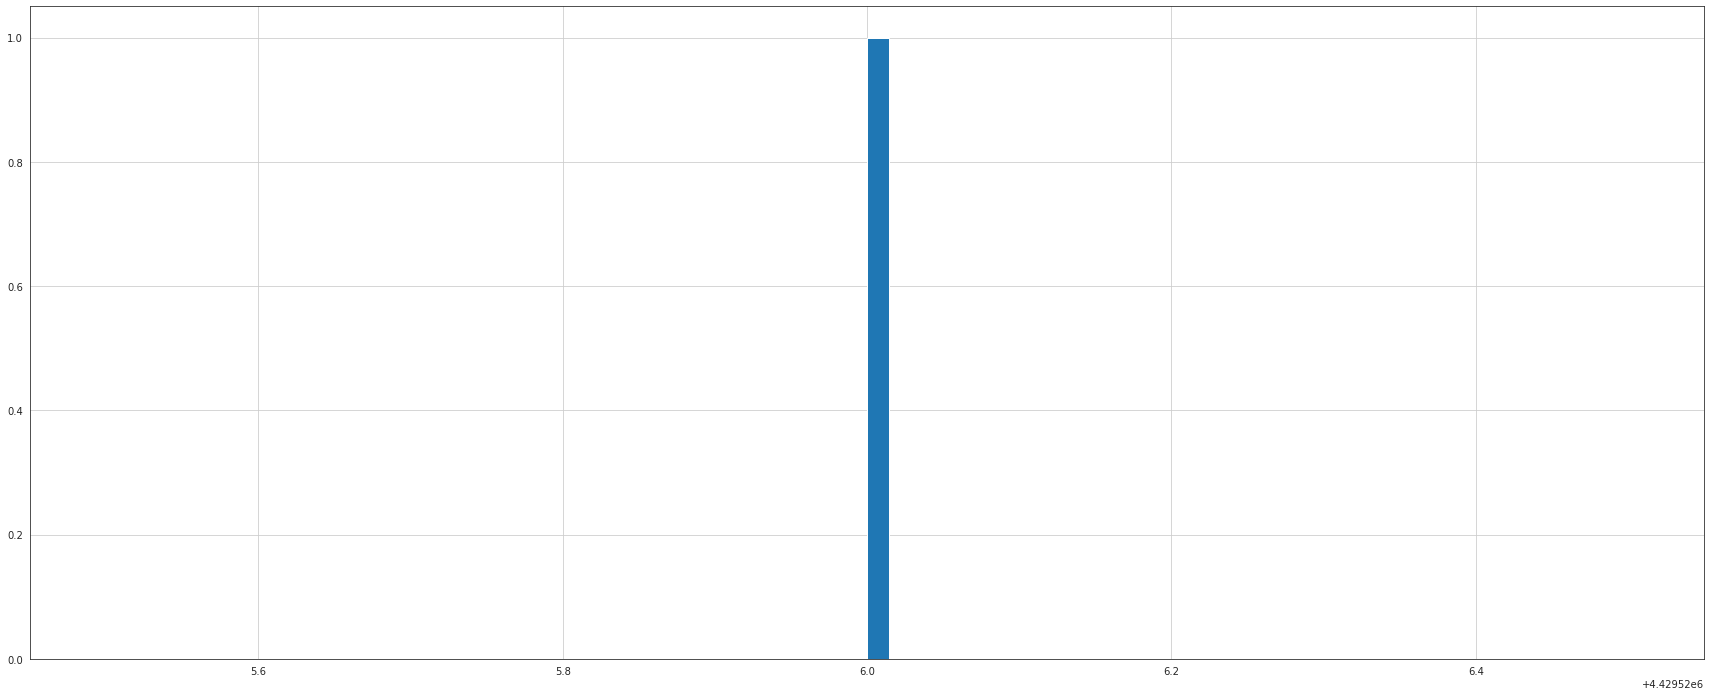

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("white")
%matplotlib inline

b = plt.figure(figsize = (30, 12))

ratings["Num of ratings"].hist(bins = 70)
     

<Figure size 2160x864 with 0 Axes>

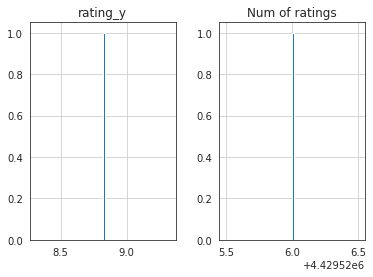

In [20]:
k = plt.figure(figsize=(30, 12))
ratings.hist(bins=70)
plt.show(k)

In [21]:
moviemat = data_df.pivot_table(index ='user_id',columns ='name', values ='rating_y')
 
moviemat.head()

ratings.sort_values("Num of ratings", ascending = False).head(25) 
     

,rating_y,Num of ratings
name,,
Cowboy Bebop,8.82,4429526


In [22]:
import os
import pandas as pd
import numpy as np
!pip install surprise
from surprise import *
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict
from surprise import accuracy
from sklearn.preprocessing import StandardScaler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 7.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626491 sha256=929c146d96ddddc8a8a38cdb40184c282bff7bf15e10bf3f149994214150cea0
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [23]:
#Подключили файлы
rating = pd.read_csv('/rating.csv')
rating.head()



,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [24]:
anime = pd.read_csv('/anime.csv')
anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [25]:
#Вывели информацию о файле 
rating.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [26]:
reader = Reader(line_format='user item rating', sep="\t")
reader = Reader(rating_scale=(0.5, 5.0))
df = Dataset.load_from_df(rating, reader)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
rating.rating.unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

In [29]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
#Визуальные моменты
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        
        
        '''))


In [ ]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

data = rating["rating"].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / rating.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(rating.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
     


In [ ]:
configure_plotly_browser_state()


data = rating.groupby('anime_id')['rating'].count().clip(upper=50)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Item (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [36]:
data.head()


anime_id
1    50
5    50
6    50
7    50
8    50
Name: rating, dtype: int64

In [37]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [38]:
type(data)

pandas.core.series.Series

In [39]:
type(df)

surprise.dataset.DatasetAutoFolds

In [40]:
# Перекрестная проверка 

param_grid = {'n_factors': [25], 'n_epochs': [15], 'lr_all': [0.001, 0.003],
              'reg_all': [0.08, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose = 432)

gs.fit(df)

# best RMSE score
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 11.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 13.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 15.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 17.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 19.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 20.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [41]:
#Подготовка обучающего и тестового набора для дальнейшего обучения и тестирования с использованием алгоритма, 
#который дает наименьшую ошибку.
trainset, testset = train_test_split(df, test_size=0.25)
algo = SVD(n_factors=40, n_epochs=25, lr_all=0.008, reg_all=0.08)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)


RMSE: 3.2563


3.256325837852625

In [42]:
#Чтобы детально изучить наши прогнозы, строим фрейм данных pandas со всеми прогнозами. 
def get_Iu(uid):
    """ 
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ 
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

#uid: user ID
#iid: item ID
#rui: real score given to iid by uid
#est: estimated score given to iid by uid
#Iu: the number of items rated by the given user
#Ui: the number of users that have rated given item
#err: error = real score — estimated score (est-rui)   
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)
df_predictions.head()


,uid,iid,rui,est,details,Iu,Ui,err
0,41593,3225,6.0,5.0,{'was_impossible': False},233,1942,1.0
1,41432,10278,9.0,5.0,{'was_impossible': False},98,1513,4.0
2,22987,9581,7.0,5.0,{'was_impossible': False},656,794,2.0
3,45368,8516,10.0,5.0,{'was_impossible': False},446,5934,5.0
4,15194,11757,7.0,5.0,{'was_impossible': False},49,22933,2.0


In [50]:
#Лучшие и худшие прогнозы
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]

temp = rating.loc[rating['anime_id'] == '0195153448']['rating']
configure_plotly_browser_state()

# Create trace
trace = go.Histogram(x = temp.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 5, size=.3))
 # Create layout
layout = go.Layout(title = 'Number of ratings item 3996 has received',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
best_predictions.head()


,uid,iid,rui,est,details,Iu,Ui,err
1101689,3896,134,5.0,5.0,{'was_impossible': False},76,2990,0.0
47263,21745,6114,5.0,5.0,{'was_impossible': False},173,2304,0.0
1896442,53713,8675,5.0,5.0,{'was_impossible': False},1076,5899,0.0
1054064,34879,896,5.0,5.0,{'was_impossible': False},286,2814,0.0
838648,14642,8532,5.0,5.0,{'was_impossible': False},298,796,0.0


In [51]:
#Вычисление точности и полноты

final = []

for threshold in np.arange(0, 5.5, 0.5):
    tp=0 #true positive
    fn=0
    fp=0
    tn=0 #true negative
    temp = []

    for uid, _, true_r, est, _ in predictions:
        if(true_r>=threshold):
            if(est>=threshold):
                tp = tp+1
            else:
                fn = fn+1
        else:
            if(est>=threshold):
                fp = fp+1
            else:
                tn = tn+1   

        if tp == 0:
            precision = 0
            recall = 0
            f1 = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1 = 2 * (precision * recall) / (precision + recall)  

    temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
    final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

,threshold,tp,fp,tn,fn,Precision,Recall,F1
0,0.0,1584314,369121,0,0,0.811040,1.000000,0.895662
1,0.5,1584314,369121,0,0,0.811040,1.000000,0.895662
2,1.0,1573407,116213,252908,10907,0.931219,0.993116,0.961172
3,1.5,1565595,104343,269011,14486,0.937517,0.990832,0.963437
4,2.0,1560936,90808,282546,19145,0.945023,0.987884,0.965978
5,2.5,1549610,84674,294505,24646,0.948189,0.984344,0.965928
6,3.0,1542309,74160,305019,31947,0.954122,0.979707,0.966745
7,3.5,1523625,73915,315632,40263,0.953732,0.974255,0.963884
8,4.0,1511412,64392,325155,52476,0.959137,0.966445,0.962777
9,4.5,1472121,76950,338691,65673,0.950325,0.957294,0.953797


In [52]:
#нахождение оптимального значения K, и чтобы его найти, 
#мы должны сначала вычислить точность и вспомнить все значения K (2–10), имеющие пороговое значение 2,5.

def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [53]:
#вызовем определенную выше функцию и усредним ее по всем пользователям.
results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.934796179083677, 'Recall': 0.32625643704477125},
 {'K': 3, 'Precision': 0.9338186903586296, 'Recall': 0.3949878312169498},
 {'K': 4, 'Precision': 0.9330383930472426, 'Recall': 0.44895131720628983},
 {'K': 5, 'Precision': 0.9322515630141907, 'Recall': 0.49361227896435883},
 {'K': 6, 'Precision': 0.9315605462323535, 'Recall': 0.5313439589729104},
 {'K': 7, 'Precision': 0.9309290498035436, 'Recall': 0.5641280919479262},
 {'K': 8, 'Precision': 0.930315440588879, 'Recall': 0.5929369403746986},
 {'K': 9, 'Precision': 0.9299023064310554, 'Recall': 0.618503133289094},
 {'K': 10, 'Precision': 0.9295159886923645, 'Recall': 0.641382334551141}]

In [54]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


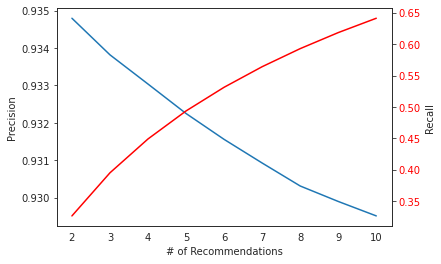

In [55]:
#ее график
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')

In [56]:
#обучаем алгоритм SVD на наборе данных 
#отбираем фильмы, которые пользователь еще не смотерл
trainset = df.build_full_trainset()   #Build on entire data set
testset = trainset.build_testset()
algo = SVD(n_factors= 25, n_epochs= 15, lr_all= 0.003, reg_all= 0.08)
algo.fit(trainset)

# Predict ratings for all pairs (u, i) that are NOT in the training set.


#Predicting the ratings for testset
predictions = algo.test(testset)

In [57]:
#сортируем оценки
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [78]:
all_pred = get_all_predictions(predictions)

In [96]:
n = 3

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]


In [97]:
#получаем фрейм топ 3 фильма для пользователя
tmp = pd.DataFrame.from_dict(all_pred,orient='index')
tmp_transpose = tmp.transpose()
tmp

,0,1,2
1,"(6547, 1.0382346773128712)","(16498, 0.8743162925970904)","(11757, 0.8458691702198018)"
2,"(11771, 5.0)","(12189, 5.0)","(16417, 4.289257802166148)"
3,"(20, 5.0)","(154, 5.0)","(170, 5.0)"
4,"(6, 0.5)","(72, 0.5)","(121, 0.5)"
5,"(6, 5.0)","(15, 5.0)","(18, 5.0)"
...,...,...,...
73512,"(60, 5.0)","(98, 5.0)","(101, 5.0)"
73513,"(1, 5.0)","(5, 5.0)","(71, 5.0)"
73514,"(512, 5.0)",None,None
73515,"(1, 5.0)","(5, 5.0)","(6, 5.0)"


In [92]:
#функция подбирающая рекомендации для определенного пользователя
def get_predictions(user_ratings):
    results = tmp_transpose.loc[user_ratings]
    return results

In [102]:
results = get_predictions(0)
results

1        (6547, 1.0382346773128712)
2                      (11771, 5.0)
3                         (20, 5.0)
4                          (6, 0.5)
5                          (6, 5.0)
                    ...            
73512                     (60, 5.0)
73513                      (1, 5.0)
73514                    (512, 5.0)
73515                      (1, 5.0)
73516                    (790, 5.0)
Name: 0, Length: 73515, dtype: object

In [103]:
recommended_anime_ids=[]
for x in range(1, n+1):
      recommended_anime_ids.append(results[x][0])

recommended_anime_ids

[6547, 11771, 20]

In [104]:
anime.head()
recommended_anime = anime[anime['anime_id'].isin(recommended_anime_ids)]

In [107]:
#топ 3 для пользователя
recommended_anime


,anime_id,name,genre,type,episodes,rating,members
122,11771,Kuroko no Basket,"Comedy, School, Shounen, Sports",TV,25,8.46,338315
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [108]:
temp = rating[rating['user_id'] == 25].sort_values("rating", ascending = False)
temp.head()

,user_id,anime_id,rating
2631,25,10793,10
2614,25,2167,10
2615,25,2904,10
2616,25,4181,10
2643,25,14813,10


In [110]:
temp.shape

(38, 3)

In [111]:
# история просмотров пользователя
history_anime_ids = temp['anime_id']
user_history = anime[anime['anime_id'].isin(history_anime_ids)]

In [112]:
user_history[:n]

,anime_id,name,genre,type,episodes,rating,members
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151


In [113]:
recommended_anime

,anime_id,name,genre,type,episodes,rating,members
122,11771,Kuroko no Basket,"Comedy, School, Shounen, Sports",TV,25,8.46,338315
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
